<a href="https://colab.research.google.com/github/msasen/pytorch/blob/main/7-tabular-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from google.colab import files

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as torch_optim
from torchvision import models
from torch.nn import init
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils import data
from torch.optim import lr_scheduler

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing


#other
from IPython.core.debugger import set_trace
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
import math 
from google.colab import files
import io
import datetime as dt
import re
import pandas_profiling
import pandas_profiling as pp
from math import sqrt

#graphs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import pylab as plt
import matplotlib.dates as dates
import seaborn as sns
import pylab
import matplotlib
import matplotlib.dates
from IPython.display import display
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
uploaded = files.upload()
df_train = pd.read_csv(("/content/temp.csv"))

In [ ]:
uploaded = files.upload()
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
df_test.head()

Saving test.csv to test (1).csv


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
df_train.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2014-03-03 19:03:42.0000005,12.5,2014-03-03 19:03:42 UTC,-73.998881,40.734511,-73.971341,40.760929,1
1,1,2012-10-13 02:31:22.0000001,31.5,2012-10-13 02:31:22 UTC,-74.007458,40.726242,-73.870459,40.762649,1
2,2,2012-07-09 09:26:00.000000168,11.7,2012-07-09 09:26:00 UTC,-73.999803,40.734717,-73.978992,40.750105,1
3,3,2012-11-12 12:09:00.00000091,7.0,2012-11-12 12:09:00 UTC,-73.963158,40.776832,-73.973088,40.763702,1
4,4,2010-12-31 21:32:53.0000001,5.3,2010-12-31 21:32:53 UTC,-73.928211,40.865160,-73.935785,40.850214,1


In [ ]:
def null_veri_temizle(df):
  print(df.isnull().sum())
  print('Old size %d'% len(df))
  df = df.dropna(how='any',axis='rows')
  print('New size %d' % len(df))
null_veri_temizle(df_train)

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    2
dropoff_latitude     2
passenger_count      0
dtype: int64
Old size 100000
New size 99998


In [ ]:
def yolculuk_vektoru_ozellikleri_ekle(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
yolculuk_vektoru_ozellikleri_ekle(df_train)
df_train

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
0,0,2014-03-03 19:03:42.0000005,12.5,2014-03-03 19:03:42 UTC,-73.998881,40.734511,-73.971341,40.760929,1,0.027540,0.026418
1,1,2012-10-13 02:31:22.0000001,31.5,2012-10-13 02:31:22 UTC,-74.007458,40.726242,-73.870459,40.762649,1,0.136999,0.036407
2,2,2012-07-09 09:26:00.000000168,11.7,2012-07-09 09:26:00 UTC,-73.999803,40.734717,-73.978992,40.750105,1,0.020811,0.015388
3,3,2012-11-12 12:09:00.00000091,7.0,2012-11-12 12:09:00 UTC,-73.963158,40.776832,-73.973088,40.763702,1,0.009930,0.013130
4,4,2010-12-31 21:32:53.0000001,5.3,2010-12-31 21:32:53 UTC,-73.928211,40.865160,-73.935785,40.850214,1,0.007574,0.014946
...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2014-12-09 08:49:58.0000001,5.5,2014-12-09 08:49:58 UTC,-73.969435,40.757047,-73.975607,40.751356,1,0.006172,0.005691
99996,99996,2012-09-06 00:14:10.0000001,9.0,2012-09-06 00:14:10 UTC,-73.994135,40.720177,-73.963127,40.711737,1,0.031008,0.008440
99997,99997,2011-06-20 14:13:18.0000003,4.9,2011-06-20 14:13:18 UTC,-73.990926,40.745783,-73.988379,40.754664,1,0.002547,0.008881
99998,99998,2011-12-03 23:24:15.0000003,12.1,2011-12-03 23:24:15 UTC,-73.987257,40.737795,-73.961614,40.795809,1,0.025643,0.058014


100000


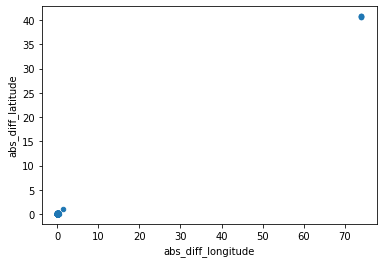

In [ ]:
print(len(df_train))
df_train[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

In [ ]:
df_train = df_train[(df_train.abs_diff_longitude<5) & (df_train.abs_diff_latitude<5)]
print(len(df_train))

99804


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
model = nn.Sequential(nn.Linear(2, 10),
                     nn.Linear(10, 5),
                      nn.Linear(5, 1))
                   

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

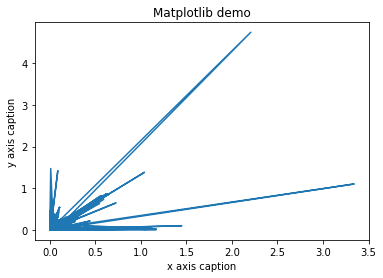

(2, 99804)

In [ ]:
X = np.stack((df_train.abs_diff_latitude.values,df_train.abs_diff_longitude.values))
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(df_train.abs_diff_latitude.values,df_train.abs_diff_longitude.values) 
plt.show()
X.shape

In [ ]:
X=X.T

In [ ]:
df = pd.DataFrame(X.T, columns = ['Column_A','Column_B'])
print(X.shape)
df

(2, 99804)


,Column_A,Column_B
0,0.026418,0.027540
1,0.036407,0.136999
2,0.015388,0.020811
3,0.013130,0.009930
4,0.014946,0.007574
...,...,...
99799,0.005691,0.006172
99800,0.008440,0.031008
99801,0.008881,0.002547
99802,0.058014,0.025643


In [ ]:
X = torch.from_numpy(X)
X = X.type(torch.FloatTensor)

In [ ]:
df = pd.DataFrame(df_train.fare_amount.values, columns = ['Column_A'])
df

,Column_A
0,12.5
1,31.5
2,11.7
3,7.0
4,5.3
...,...
99799,5.5
99800,9.0
99801,4.9
99802,12.1


In [ ]:
y = torch.from_numpy(df_train.fare_amount.values.T)
y = y.type(torch.FloatTensor)
y.unsqueeze_(-1)
y.shape

torch.Size([99804, 1])

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


In [ ]:
for epoch in range(90):
    # Forward Propagation
    y_pred = model(X)
    # Compute and print loss
    loss = criterion(y_pred, y)
    print('epoch: ', epoch,' loss: ', loss.item())
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward()
    
    # Update the parameters
    optimizer.step()

RuntimeError: ignored

In [ ]:
for epoch in range(700):
    # Forward Propagation
    y_pred = model(X)
    # Compute and print loss
    loss = criterion(y_pred, y)
    print('epoch: ', epoch,' loss: ', loss.item())
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward()
    
    # Update the parameters
    optimizer.step()

RuntimeError: ignored

In [ ]:
add_travel_vector_features(test_df)


In [ ]:
X_test = np.stack((test_df.abs_diff_latitude.values,test_df.abs_diff_longitude.values)).T
X_test = torch.from_numpy(X_test)
X_test = X_test.type(torch.FloatTensor)


In [ ]:
y_test = model(X_test)


In [ ]:
y_test[:20]


In [ ]:
y_test = y_test.detach().numpy()


In [ ]:
y_test = y_test.reshape(-1)


In [ ]:
y_test


array([ 9.358396 ,  9.86723  ,  7.6704893, ..., 39.03984  , 17.533674 ,
        8.91773  ], dtype=float32)

In [ ]:
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': y_test},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)
